## MeritRank as a recommendation algorithm

1. Subjective evaluation of contribution (by merit and demerit).
    - Users evaluate items, and form a graph of transitive relationship.
    - For example, the evaluation can be binary - like, dislike.
2. Recommendation and ranking using graph of evaluation.
    - Recommend an item using the network structure.
3. Filter and organized communities based on their expressed preferences.
    - Like of item A -> Recommend all positive out-edges from A.
    - Dislike of A -> Punish all nodes in a transitive path to A.


Recommend and connect based on attribution:
    - *Transitivity of Love*: I like it, so I must others suggestions/likes from it. Use transitiviy on positive attribution. My like gives you power to recommend.
    - *Consequences of Hate*: I dislike it, adjust the recommendation.
    - *Conflict potential*: I like, they dislike or They like, I dislike - decrease score, use conflict mitigation (Avoid, Accomodate, Compromise, Compete, Collaborate) - decrease score





In [1]:
import networkx as nx

from trust.hitting_time import BL_PHT, PersonalizedHittingTime


In [2]:
# Create test graph
PG = nx.DiGraph() # positive contribution graph


CREATES = 50
LIKES = 1
DISLIKES = -1

CREATED_BY = 50
RELATED_TO = 1


# User creates posts and ranks them (optionally)
PG.add_edge("user1", "post1", weight = CREATES)
PG.add_edge("post1", "user1", weight = CREATED_BY)

PG.add_edge("user2", "post2", weight = CREATES)
PG.add_edge("post2", "user2", weight = CREATED_BY)

# Note: If user3 thinks post4 is more important - assign more weight
PG.add_edge("user3", "post3", weight = CREATES)
PG.add_edge("user3", "post4", weight = CREATES)
PG.add_edge("post3", "user3", weight = CREATED_BY)
PG.add_edge("post4", "user3", weight = CREATED_BY)


# Users like posts
PG.add_edge("user1", "post2", weight=LIKES)
PG.add_edge("user1", "post3", weight=DISLIKES)
PG.add_edge("user2", "post3", weight=DISLIKES)

# User's negative attributions, aka dislikes

# The effect of negative edges - decrease the reputation of the node.
# Stop any positive transitivity.
# Transitively punish all nodes with positive relationship to the target node.

# As an effect the total proportional reputation is also split between positive and negative attributions.


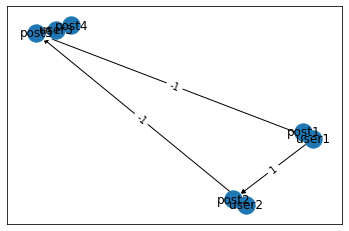

In [3]:
def vis_graph(g):
    # Visualize the graph, for clarity
    pos=nx.spring_layout(g)
    nx.draw_networkx(g,pos)
    labels = nx.get_edge_attributes(g,'weight')
    nx.draw_networkx_edge_labels(g,pos,edge_labels=labels)

vis_graph(PG)

In [4]:
# Since we use it for recommendation for the user1 - we need to remove user1 contributions. We don't recommend own content to the user.

G1 = PG.copy()
G1.remove_edge("user1", "post1")
G1.remove_edge("post1", "user1")

ppr = PersonalizedHittingTime(G1, "user1", reset_probability=0.15)

In [5]:
for g in G1.nodes():
    print('Reputation for {} is {}'.format(g, ppr.compute('user1', g)))

Reputation for user1 is 1.287001287001287
Reputation for post1 is 0.0
Reputation for user2 is 0.4491634491634492
Reputation for post2 is 0.5508365508365508
Reputation for user3 is 0.0
Reputation for post3 is 0.0
Reputation for post4 is 0.0


In [6]:
blppr = BL_PHT(G1, 'user1')

In [7]:
for g in G1.nodes():
    print('Reputation for {} is {}'.format(g, blppr.compute('user1', g)))

Reputation for user1 is 0.8237232289950577
Reputation for post1 is 0.0
Reputation for user2 is 0.28665568369028005
Reputation for post2 is 0.3418451400329489
Reputation for user3 is -0.12663912807070224
Reputation for post3 is -0.1830045203333847
Reputation for post4 is -0.06185552787268404
